In [79]:
import pandas as pd

In [80]:
pwd

'C:\\Users\\danma\\OneDrive\\Documents\\GitHub\\capstone2023'

In [81]:
df = pd.read_csv('Data\Combined2_DateFrames.csv', low_memory=False)

In [82]:
df=df.drop('Unnamed: 0',axis=1)

In [83]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status
0,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:11,REG
1,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:12,RAC
2,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:14,RAC
3,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:16,RAC
4,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 13:08,RAC
...,...,...,...,...,...,...,...,...,...
234542,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,23/12/2022 06:33,REG
234543,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,08/01/2023 14:42,RAC
234544,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,21/02/2023 09:58,RAC
234545,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,20/05/2023 09:49,RAC


In [84]:
# Convert 'OccurredAt' column to datetime
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

In [85]:
# Sort DataFrame based on 'OccurredAt' in descending order
df = df.sort_values(by="OccuredAt", ascending=False)

In [86]:
# Find the unique earmarks
unique_earmarks = df["Earmark"].unique()

In [87]:
# Update 'Status' column for the last entry in each group
for earmark in unique_earmarks:
    last_row_index = df[df["Earmark"] == earmark].index[0]
    df.at[last_row_index, "Status"] = df.at[last_row_index, "Retirement Type"]

In [90]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [91]:
df1 = df

In [37]:
# Write DataFrame to a CSV file with the specified date format
#df.to_csv("output.csv", index=False)

In [49]:
#df = pd.read_csv('output.csv', low_memory=False)

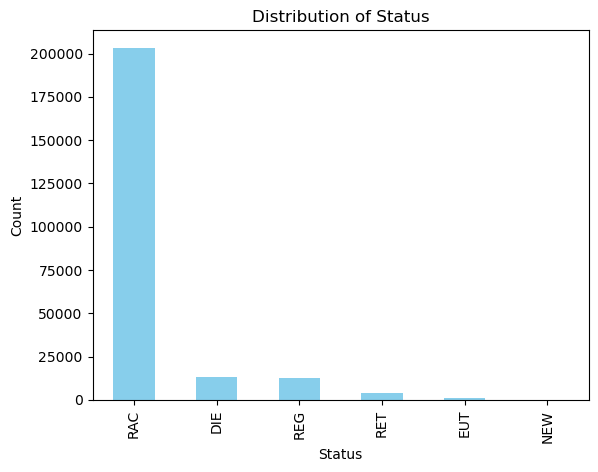

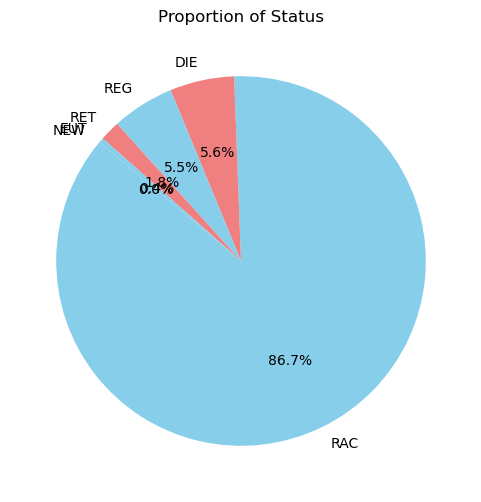

In [92]:
import matplotlib.pyplot as plt
# Plot a bar chart to show the distribution of 'Status'
status_counts = df["Status"].value_counts()
status_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Plot a pie chart to show the proportion of each 'Status'
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])
plt.title("Proportion of Status")
plt.show()

In [93]:
subset = df[['OccuredAt','Status']]

In [94]:
subset["OccuredAt"] = pd.to_datetime(subset["OccuredAt"]);

C:\Users\danma\AppData\Local\Temp\ipykernel_5576\1398405935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["OccuredAt"] = pd.to_datetime(subset["OccuredAt"]);


In [95]:
# Set "OccurredAt" as the index
subset.set_index("OccuredAt", inplace=True)

In [99]:

# Plot the time series
#plt.figure(figsize=(10, 6))
#plt.plot(subset.index, subset["Status"], marker='o')
#plt.title("Time Series of Status")
#plt.xlabel("Time")
#plt.ylabel("Status")
#plt.grid(True)
#plt.show()

In [59]:
# Resample the data to a weekly frequency and count the occurrences of each status
#resampled_df = df.resample("W").count()

In [97]:
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

# Set "OccurredAt" as the index
df.set_index("OccuredAt", inplace=True)

# Resample the data to a weekly frequency and count the occurrences of each status
resampled_df = df.resample("W").count()

In [98]:
resampled_df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
OccuredAt,,,,,,,,
2021-01-10,30,30,30,30,30,30,30,30
2021-01-17,76,76,76,76,76,76,76,76
2021-01-24,0,0,0,0,0,0,0,0
2021-01-31,0,0,0,0,0,0,0,0
2021-02-07,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2023-11-12,238,242,242,238,238,238,238,240
2023-11-19,0,0,0,0,0,0,0,0
2023-11-26,0,0,0,0,0,0,0,0


In [100]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
OccuredAt,,,,,,,,
2023-12-07 14:41:00,COOLEMORE COUNT,YVRYL,9.772000e+14,12/02/2022,B,12/02/2022,DIE,DIE
2023-12-07 12:24:00,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,RET,RET
2023-12-07 11:34:00,PECKIES DAFFY,VYRAJ,9.722740e+14,07/05/2021,B,26/03/2020,RET,RET
2023-12-07 11:24:00,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,RET,RAC
2023-12-07 10:25:00,SHELONE KING,UUKTL,9.722740e+14,15/04/2019,D,15/04/2019,RET,RET
...,...,...,...,...,...,...,...,...
NaT,KNOCKGLASS KING,VPISU,9.772000e+14,01/04/2021,D,18/03/2020,EUT,EUT
NaT,HELLO HOLLIE,TDVXR,9.722740e+14,23/04/2021,B,04/08/2018,EUT,EUT
NaT,SEOMRA DISC,UYIKE,9.722740e+14,04/05/2021,D,12/12/2019,EUT,EUT


In [101]:
df.reset_index(inplace = True)

In [102]:
df

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
0,2023-12-07 14:41:00,COOLEMORE COUNT,YVRYL,9.772000e+14,12/02/2022,B,12/02/2022,DIE,DIE
1,2023-12-07 12:24:00,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,RET,RET
2,2023-12-07 11:34:00,PECKIES DAFFY,VYRAJ,9.722740e+14,07/05/2021,B,26/03/2020,RET,RET
3,2023-12-07 11:24:00,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,RET,RAC
4,2023-12-07 10:25:00,SHELONE KING,UUKTL,9.722740e+14,15/04/2019,D,15/04/2019,RET,RET
...,...,...,...,...,...,...,...,...,...
234542,NaT,KNOCKGLASS KING,VPISU,9.772000e+14,01/04/2021,D,18/03/2020,EUT,EUT
234543,NaT,HELLO HOLLIE,TDVXR,9.722740e+14,23/04/2021,B,04/08/2018,EUT,EUT
234544,NaT,SEOMRA DISC,UYIKE,9.722740e+14,04/05/2021,D,12/12/2019,EUT,EUT
234545,NaT,KILWEST NOAH,VVTMH,9.772000e+14,24/11/2021,D,20/09/2020,EUT,EUT


In [103]:
df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

C:\Users\danma\AppData\Local\Temp\ipykernel_5576\3838613621.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])


In [104]:
# Filter data for greyhounds with "RET" (Death) status
ret_data = df[df["Status"] == "RET"]

In [105]:
# Filter data for greyhounds with "RET" (Death) status and valid OccuredAt dates
ret_data = df[(df["Status"] == "RET") & (~df["OccuredAt"].isnull())]

In [106]:
ret_data

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
1,2023-12-07 12:24:00,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,2019-04-21,RET,RET
2,2023-12-07 11:34:00,PECKIES DAFFY,VYRAJ,9.722740e+14,07/05/2021,B,2020-03-26,RET,RET
4,2023-12-07 10:25:00,SHELONE KING,UUKTL,9.722740e+14,15/04/2019,D,2019-04-15,RET,RET
21,2023-12-07 06:34:00,THORNEY RUN,XPHIB,9.772000e+14,03/09/2021,B,2021-01-06,RET,RET
46,2023-12-07 06:34:00,HELP MEOUT PADDY,XXLTU,9.772000e+14,22/12/2021,D,2021-09-09,RET,RET
...,...,...,...,...,...,...,...,...,...
230694,2021-01-12 06:02:00,BALLYVOE ACE,SQDNX,9.722740e+14,24/01/2018,D,2017-05-11,RET,RET
230697,2021-01-12 06:02:00,CODE MEL,UYEVM,9.722740e+14,12/04/2021,B,2019-04-21,RET,RET
230737,2021-01-10 06:01:00,VIEW RON,UPJAA,9.722740e+14,04/10/2019,D,2019-12-06,RET,RET
230739,2021-01-10 06:01:00,BALLYGUR MING,SDDUI,9.722740e+14,06/03/2018,B,2017-09-10,RET,RET


In [107]:
# Calculate the time difference in days between Whelp Date and OccuredAt
ret_data["Days_Lived"] = (ret_data["OccuredAt"] - ret_data["Whelp Date"]).dt.days

C:\Users\danma\AppData\Local\Temp\ipykernel_5576\3479783897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_data["Days_Lived"] = (ret_data["OccuredAt"] - ret_data["Whelp Date"]).dt.days


In [108]:
ret_data["Days_Lived"]

1         1691.0
2         1351.0
4         1697.0
21        1065.0
46         819.0
           ...  
230694    1342.0
230697     632.0
230737     401.0
230739    1218.0
230751     401.0
Name: Days_Lived, Length: 3133, dtype: float64

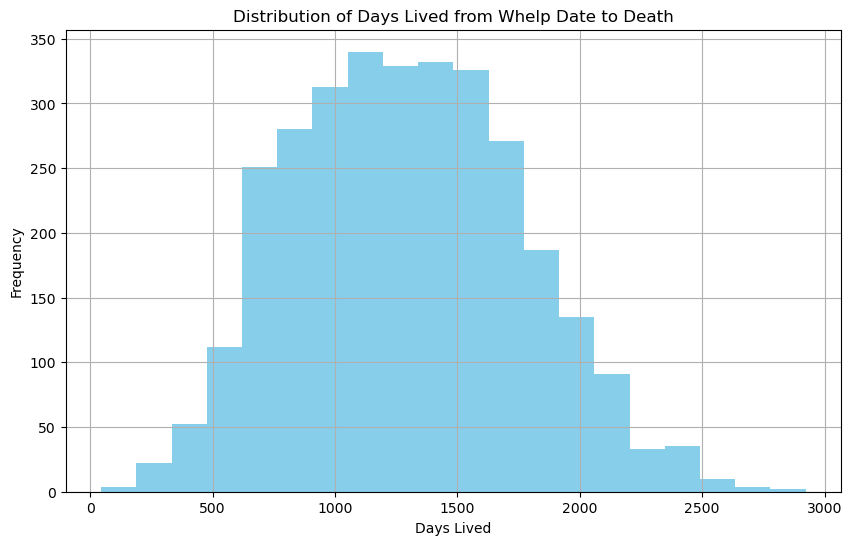

In [109]:
# Plot a histogram of days lived
plt.figure(figsize=(10, 6))
plt.hist(ret_data["Days_Lived"], bins=20, color="skyblue")
plt.title("Distribution of Days Lived from Whelp Date to Death")
plt.xlabel("Days Lived")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [110]:
# Print descriptive statistics
print(ret_data["Days_Lived"].describe())

count    3129.000000
mean     1293.985618
std       466.391978
min        45.000000
25%       943.000000
50%      1286.000000
75%      1623.000000
max      2923.000000
Name: Days_Lived, dtype: float64


The distribution of the time from "Whelp Date" to "Death" is not typically expected to be normally distributed. The lifespan of living organisms, including greyhounds, can often follow more complex patterns due to various factors such as genetics, environment, health, and more. As a result, the distribution of lifespans can be skewed, have multiple peaks, or exhibit other non-normal characteristics.

If you plot the distribution of days lived from "Whelp Date" to "Death," you might find that the distribution is more likely to be right-skewed. This means that there may be a larger number of greyhounds with shorter lifespans and a smaller number with longer lifespans. The presence of outliers (greyhounds with exceptionally long lifespans) could further contribute to the non-normal distribution.

A histogram or a kernel density plot can provide a visual representation of the distribution. Additionally, you can use summary statistics such as mean, median, and standard deviation to quantify the central tendency and spread of the distribution.